# Analysis of Sales Influenced by Season and Temperature

This notebook aims to explore how different seasons and temperature levels affect sales through a synthetic dataset. We will generate data representing sales across different seasons and temperatures, hypothesizing that interactions between these factors can significantly impact sales outcomes.

We will visually and statistically analyze the main effects of each factor and their interaction to understand their impacts better. The analysis will conclude with fitting linear models to quantify these effects.

#### Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Generate Synthetic Dataset

In [23]:
# Setting a random seed for reproducibility
np.random.seed(2)

# Generate categories
season = np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], 1000, replace=True)
temp = np.random.choice(['low', 'medium', 'high'], 1000, replace=True)

# Define sales based on season and temperature with specific interactions
sales = np.random.normal(100, 5, 1000) + \
        20 * ((season == 'Summer') & (temp == 'high')) - \
        20 * ((season == 'Summer') & (temp == 'low')) - \
        20 * ((season == 'Winter') & (temp == 'high')) + \
        20 * ((season == 'Winter') & (temp == 'low'))

# Create DataFrame
df = pd.DataFrame({'Season': season, 'Temperature': temp, 'Sales': sales})

print(df.head(10))


   Season Temperature       Sales
0  Spring         low   93.781423
1  Winter        high   82.393617
2  Summer        high  119.745644
3  Spring         low   92.509541
4    Fall      medium   93.232105
5  Winter         low  120.497193
6    Fall        high   92.315245
7  Winter         low  122.881046
8  Spring         low   93.756572
9  Winter      medium  104.004960


#### Exploratory Data Visualization

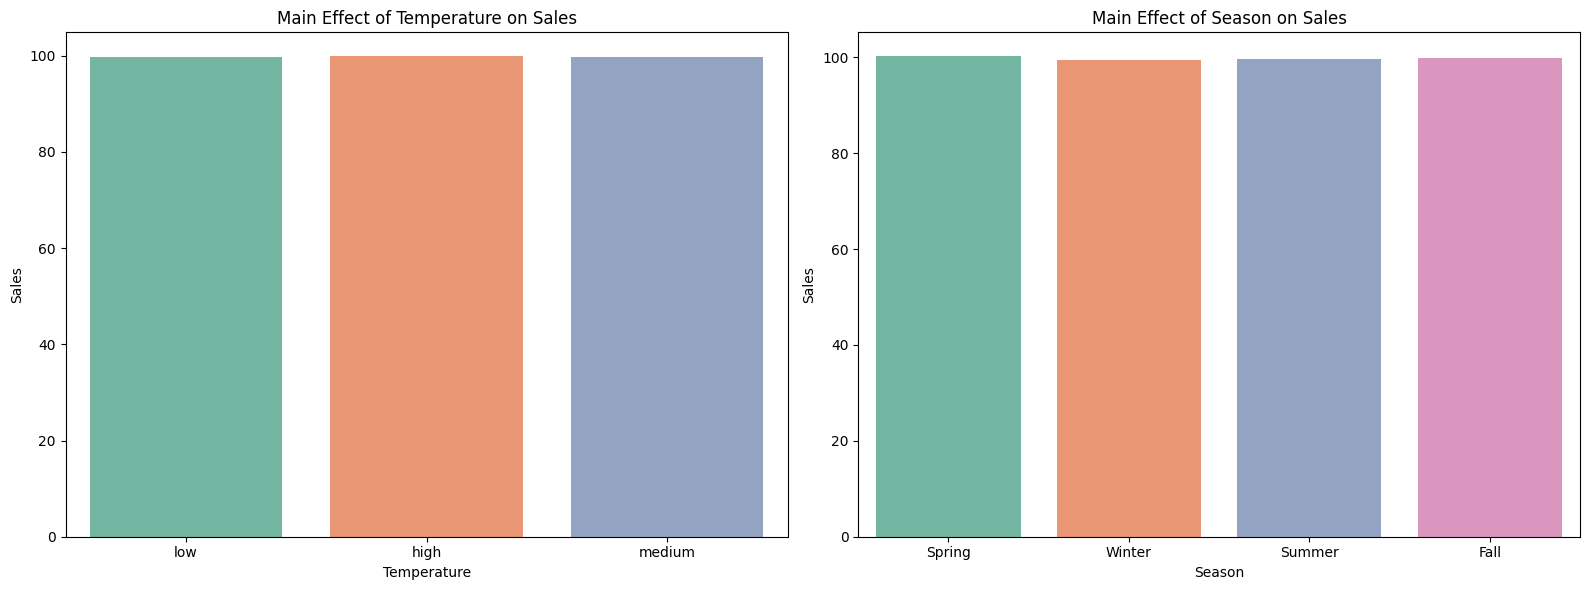

In [20]:
# Plotting the main effects of Temperature and Season on Sales side by side
plt.figure(figsize=(16, 6))  # Set the figure size to be large enough for two subplots

# Subplot 1: Main Effect of Temperature on Sales
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Temperature', y='Sales', data=df, errorbar=None, palette='Set2')
plt.title('Main Effect of Temperature on Sales')
plt.xlabel('Temperature')
plt.ylabel('Sales')

# Subplot 2: Main Effect of Season on Sales
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Season', y='Sales', data=df, errorbar=None, palette='Set2')
plt.title('Main Effect of Season on Sales')
plt.xlabel('Season')
plt.ylabel('Sales')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


#### Linear Model without Interaction

In [14]:
# Fit and summarize the linear model without interaction
model = smf.ols('Sales ~ C(Season) + C(Temperature)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1009
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.992
Time:                        12:09:59   Log-Likelihood:                -3940.1
No. Observations:                1000   AIC:                             7892.
Df Residuals:                     994   BIC:                             7922.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Visualizing Interaction Effects

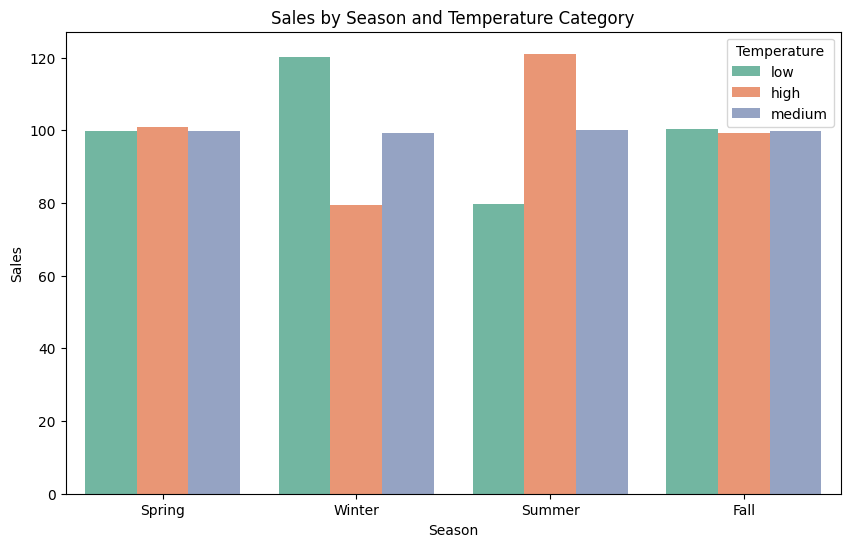

In [16]:
# Visualize the interaction effect between Season and Temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Sales', hue='Temperature', data=df, errorbar=None, palette='Set2')
plt.title('Sales by Season and Temperature Category')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

### Linear Model with Interaction

In [17]:
# Fit and summarize the linear model with interaction
model_interaction = smf.ols('Sales ~ C(Season) + C(Temperature) + C(Season):C(Temperature)', data=df).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        12:09:59   Log-Likelihood:                -2978.9
No. Observations:                1000   AIC:                             5982.
Df Residuals:                     988   BIC:                             6041.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------